# DATA CLEANING

In [1]:
import os
import json 
import csv
import numpy as np
import pandas as pd 



## Correct JSONs
This coorects an erroor made during scraping

In [ ]:
#lucca-livorno- pistoia - pisa - prato- siena - firenze -massacarrara -arezzo 

In [3]:
datafolder = 'data/massacarrara/' 
files = [f for f in os.listdir(datafolder) ]


for f in files:
    
    filejson = open(datafolder+f,'r')
    try :
        data = json.load(filejson)
        filejson.close()
    except:
        filejson.close()
        continue
    
    for dictionary in data:
        dictionary['N_reviews'] = dictionary.pop(list(dictionary.keys())[-1])
    
    filejson = open(datafolder+f,'w')
    json. dump(data, filejson)
    filejson.close()

In [9]:
provinces = ['arezzo', 'firenze', 'grosseto', 'livorno', 'lucca', 'massacarrara',  'pisa', 'pistoia', 'prato', 'siena']
len(provinces)

10

## Cleaning CSVs
Here we merge the basic csv and the rich csvs for each province.
We clean and transform some feature, as the price for example.
At the end all csv files are merged in a unique dataframe. Duplicated are removed and the csv is saved.

In [4]:
def priceTransform(price):
    if pd.isnull(price): return None
    price  = price.split(' - ')
    if len(price) == 1: return len(price[0])
    else: return len(price[0])+0.5
    
#priceTransform(dfi.loc[56,'price'])

In [5]:
def cleanCSVof(provincename):
    
    #JOIN
    dfL = pd.read_csv(f'./data/{provincename}.csv')
    dfR = pd.read_csv(f'./data/{provincename}_plus.csv')
    dfi = dfL.join(dfR)
    
    #CLEANING
    dfi = dfi[dfi.N_reviews != 0] #delete restaurant without reviews
    dfi['province'] = provincename
    dfi.price = list(map(priceTransform,dfi.price))
    dfi.drop('coordinates',axis=1,inplace=True)
    try:dfi.Province = dfi.Province.apply(lambda x: x.split(' of ')[1].lower().replace(' ','') if x.find(' of ')>0 else x)
    except: print(provincename)
    
    #SAVING
    dfi.to_csv(f'./data/{provincename}_clean.csv')
    

In [6]:
provinces = ['livorno','pisa','prato','lucca','arezzo','grosseto','pistoia','florence','massacarrara','siena']
print(len(provinces))
for provincename in provinces:
    cleanCSVof(provincename)

10


In [7]:
df=pd.DataFrame()
for provincename in provinces:
    dfi = pd.read_csv(f'data/{provincename}_clean.csv',index_col=0)
    df = df.append(dfi)
    
df

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,covidMeasure,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link
0,1,Mezzo Km,Venturina Terme,False,/Restaurant_Review-g2135990-d14157164-Reviews-...,5.0,480,2.5,Mezzo Km,livorno,...,False,True,43.023445,10.608956,"Italian, Mediterranean, Healthy, Tuscan, Centr...",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",A7v_https://maps.google.com/maps?saddr=&daddr=...,livorno,NaN
1,2,Il Sorpasso Bistro,Castiglioncello,False,/Restaurant_Review-g666540-d20209260-Reviews-I...,5.0,115,2.5,Il Sorpasso Bistro,livorno,...,True,False,43.400314,10.426365,"Italian, Seafood, Mediterranean, Healthy","Lunch, Dinner, Late Night, Drinks",NaN,X2s_https://maps.google.com/maps?saddr=&daddr=...,livorno,NaN
2,3,57025 Bistrot,Piombino,False,/Restaurant_Review-g187900-d16724216-Reviews-5...,5.0,144,2.5,57025 Bistrot,livorno,...,True,False,42.924150,10.528860,"Italian, Seafood, Mediterranean, Tuscan, Centr...","Lunch, Dinner",NaN,v6m_https://maps.google.com/maps?saddr=&daddr=...,livorno,NaN
3,4,Trattoria di pesce il giardino,Elba Island,True,/Restaurant_Review-g194711-d3498923-Reviews-Tr...,4.5,1019,2.5,Trattoria di pesce il giardino,livorno,...,False,True,42.745113,10.377239,NaN,NaN,NaN,V2p_https://maps.google.com/maps?saddr=&daddr=...,livorno,NaN
4,5,Bullit Drink and Food,Piombino,False,/Restaurant_Review-g187900-d4878588-Reviews-Bu...,5.0,424,1.0,Bullit Drink and Food,livorno,...,True,True,42.978760,10.531880,"Mexican, American, Bar, Barbecue, European","Lunch, Dinner, Brunch, Late Night","Vegetarian Friendly, Vegan Options, Gluten Fre...",tUL_https://maps.google.com/maps?saddr=&daddr=...,livorno,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,1487,Caffetteria il Magnifico,Siena,False,/Restaurant_Review-g187902-d4722257-Reviews-Ca...,2.0,104,2.5,Caffetteria il Magnifico,siena,...,False,False,43.318270,11.329550,"Bar, Pub",NaN,NaN,VQO_https://maps.google.com/maps?saddr=&daddr=...,siena,/Restaurant_Review-g187902-d4722257-Reviews-Ca...
1487,1488,Caffe del Corso,Siena,False,/Restaurant_Review-g187902-d2627161-Reviews-Ca...,2.0,318,2.5,Caffe del Corso,siena,...,False,False,43.319700,11.331285,"Italian, Pizza",Late Night,NaN,aTt_https://maps.google.com/maps?saddr=&daddr=...,siena,/Restaurant_Review-g187902-d2627161-Reviews-Ca...
1488,1489,Bistrot,Siena,False,/Restaurant_Review-g187902-d1088347-Reviews-Bi...,1.5,19,NaN,Bistrot,siena,...,False,False,43.344658,11.302912,NaN,NaN,NaN,LIF_https://maps.google.com/maps?saddr=&daddr=...,siena,/Restaurant_Review-g187902-d1088347-Reviews-Bi...
1489,1490,Beppone,San Gimignano,False,/Restaurant_Review-g187901-d1699883-Reviews-Be...,2.0,497,2.5,Beppone,siena,...,False,False,43.468067,11.043525,"Italian, Pizza, Mediterranean",Late Night,NaN,O6j_https://maps.google.com/maps?saddr=&daddr=...,siena,/Restaurant_Review-g187901-d1699883-Reviews-Be...


In [8]:
df['provinceOK'] = 0
df.loc[df.Province == df.province,'provinceOK'] = 1

df.sort_values('provinceOK',inplace=True)

#this is only provvisory
df.drop_duplicates(subset=['link'], keep='last', inplace=True)


In [9]:
print(len(df))
df.provinceOK.value_counts()

16181


1    15861
0      320
Name: provinceOK, dtype: int64

In [10]:
df.loc[df.provinceOK==0,['province','Province']]

,province,Province
2797,pisa,brindisi
1417,lucca,modena
1412,lucca,modena
1634,lucca,laspezia
1664,lucca,modena
...,...,...
2396,lucca,laspezia
2361,lucca,modena
2448,lucca,Italian Riviera
2457,lucca,modena


In [11]:
print(len(df),sum(df.Province.value_counts()))
df.Province.value_counts()

16181 16181


florence           3803
lucca              1984
livorno            1840
pisa               1689
grosseto           1587
siena              1491
arezzo             1149
pistoia             977
massacarrara        803
prato               543
bologna             210
laspezia             38
modena               31
Italian Riviera      24
ferrara               2
reggioemilia          2
bari                  1
treviso               1
ascolipiceno          1
rieti                 1
brindisi              1
southtyrol            1
cosenza               1
varese                1
Name: Province, dtype: int64

In [12]:
df=df[df.Province.isin(provinces)]


In [13]:
print(len(df),sum(df.Province.value_counts()))
df.Province.value_counts()

15866 15866


florence        3803
lucca           1984
livorno         1840
pisa            1689
grosseto        1587
siena           1491
arezzo          1149
pistoia          977
massacarrara     803
prato            543
Name: Province, dtype: int64

In [14]:
df.reset_index(inplace=True, drop=True)


In [15]:
df.to_csv('data/tuscany.csv')

## merging jsons
Starting from the complete dataframe, we use ti to open each json file from eash folder and genrate an unique one json file. The indexes of the dataframe are used as keys fro the json.

In [16]:
to_drop = list()
data = dict()

for i, (name,prov,pos,link) in df[['name','province','position','link']].iterrows(): 
   
    try: 
        
        injson = open(f'data/{prov}/{str(int(pos)-1)}.json')
        #data[f'{prov}_{pos}']  = json.load(injson)
        data[int(i)]  = json.load(injson)
        injson.close()

    except: 
        print(f'{name} -> {prov}_{pos}',end='\n')
        to_drop.append(i)
        
with open(f'data/tuscany.json', 'w+') as fp:
    json.dump(data, fp) 

Bagno Ristorante La Rondine -> pisa_1362
.  -> siena_2020
.  -> siena_2020
Taro Garden -> prato_844
Dark Kitchen Italia -> livorno_2095


## RE-CLEANING

In [21]:
df = pd.read_csv("data/tuscany.csv",index_col=0)
df.head()

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK
0,1362,Bagno Ristorante La Rondine,Viareggio,False,/Restaurant_Review-g194946-d3963886-Reviews-Ba...,4.5,55,2.5,Bagno La Rondine,lucca,...,False,43.888190,10.229208,"Italian, Seafood","Lunch, Dinner",NaN,FFz_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g194946-d3963886-Reviews-Ba...,0
1,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,lucca,...,False,43.851350,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0
2,551,Acino Bianco,Marina di Massa,False,/Restaurant_Review-g194814-d12843022-Reviews-A...,4.5,92,2.5,Acino Bianco,massacarrara,...,True,44.004616,10.115488,Italian,Dinner,"Vegetarian Friendly, Gluten Free Options",yEU_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194814-d12843022-Reviews-A...,0
3,308,El Artista Ristorante Argentino,Massa,False,/Restaurant_Review-g660766-d17543924-Reviews-E...,4.5,78,2.5,El Artista Ristorante Argentino,massacarrara,...,False,44.041000,10.124396,"Barbecue, Argentinean, Steakhouse","Dinner, Lunch",NaN,U0P_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g660766-d17543924-Reviews-E...,0
4,1285,La Locanda di Bivigliano,Bivigliano,False,/Restaurant_Review-g1957776-d13948598-Reviews-...,NaN,28,NaN,La Locanda di Bivigliano,florence,...,False,43.896214,11.321173,"Italian, Mediterranean, Barbecue, Tuscan, Cent...",NaN,Vegetarian Friendly,rg1_https://maps.google.com/maps?saddr=&daddr=...,prato,/Restaurant_Review-g1957776-d13948598-Reviews-...,0


In [17]:
to_drop

[0, 3686, 3849, 9274, 11306]

In [22]:
to_drop= [0, 9274, 11306]

In [23]:
df.drop(to_drop,inplace=True)
df.to_csv('data/example.csv')
df


,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK
1,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,lucca,...,False,43.851350,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0
2,551,Acino Bianco,Marina di Massa,False,/Restaurant_Review-g194814-d12843022-Reviews-A...,4.5,92,2.5,Acino Bianco,massacarrara,...,True,44.004616,10.115488,Italian,Dinner,"Vegetarian Friendly, Gluten Free Options",yEU_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194814-d12843022-Reviews-A...,0
3,308,El Artista Ristorante Argentino,Massa,False,/Restaurant_Review-g660766-d17543924-Reviews-E...,4.5,78,2.5,El Artista Ristorante Argentino,massacarrara,...,False,44.041000,10.124396,"Barbecue, Argentinean, Steakhouse","Dinner, Lunch",NaN,U0P_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g660766-d17543924-Reviews-E...,0
4,1285,La Locanda di Bivigliano,Bivigliano,False,/Restaurant_Review-g1957776-d13948598-Reviews-...,NaN,28,NaN,La Locanda di Bivigliano,florence,...,False,43.896214,11.321173,"Italian, Mediterranean, Barbecue, Tuscan, Cent...",NaN,Vegetarian Friendly,rg1_https://maps.google.com/maps?saddr=&daddr=...,prato,/Restaurant_Review-g1957776-d13948598-Reviews-...,0
5,1499,Beach Bar @PuntAla,Punta Ala,False,/Restaurant_Review-g194871-d19315573-Reviews-B...,2.5,2,1.0,Beach Bar @PuntAla,grosseto,...,False,42.841410,10.775602,"Italian, Mediterranean","Lunch, Brunch, Drinks",NaN,32Q_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194871-d19315573-Reviews-B...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,1543,Nicola's Irish Pub,Lucca,False,/Restaurant_Review-g187898-d2546758-Reviews-Ni...,3.5,103,2.5,Nicola's Irish Pub,lucca,...,False,43.830280,10.497290,"Bar, Pub, Italian","Dinner, Late Night, Drinks",NaN,PHI_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g187898-d2546758-Reviews-Ni...,1
15862,1544,Bagno Montecristo di Levante,Forte Dei Marmi,False,/Restaurant_Review-g194766-d6659308-Reviews-Ba...,4.0,40,2.5,Bagno Montecristo di Levante,lucca,...,False,43.958260,10.165539,"Italian, Seafood","Breakfast, Lunch",Vegetarian Friendly,5zH_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194766-d6659308-Reviews-Ba...,1
15863,1546,Surfer Joe Cafe and Diner Lucca,Lucca,False,/Restaurant_Review-g187898-d13138519-Reviews-S...,3.5,97,1.0,Surfer Joe Cafe and Diner Lucca,lucca,...,False,43.839756,10.504320,"American, Mexican, Central American, Bar, Sout...","Lunch, Dinner, Late Night, Drinks, Brunch",Vegetarian Friendly,lD0_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g187898-d13138519-Reviews-S...,1
15864,1548,Ristorum in Campus Maior,Montemagno,True,/Restaurant_Review-g3802334-d12094110-Reviews-...,4.0,33,2.5,Ristorum in Campus Maior,lucca,...,False,43.910076,10.339700,Mediterranean,"Brunch, Breakfast, Lunch, Dinner",NaN,KLl_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g3802334-d12094110-Reviews-...,1


In [24]:
df.reset_index(inplace=True,drop=True)
df.to_csv('data/example.csv')
to_drop = list()
datayears = dict()

for i, (name,prov,pos,link) in df[['name','province','position','link']].iterrows(): 
   
    try: 
        
        injson = open(f'data/{prov}/{str(int(pos)-1)}.json')
        #data[f'{prov}_{pos}']  = json.load(injson)
        data[int(i)]  = json.load(injson)
        injson.close()

    except: 
        print(f'{name} -> {prov}_{pos}',end='\n')
        to_drop.append(i)
        
with open(f'data/example.json', 'w+') as fp:
    json.dump(data, fp) 

In [3]:
a

TypeError: vars() argument must have __dict__ attribute

## Clean attributes

In [39]:
import pandas as pd
df = pd.read_csv("data/tuscany.csv",index_col=0)
df.head()

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK
0,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,lucca,...,False,43.851350,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0
1,551,Acino Bianco,Marina di Massa,False,/Restaurant_Review-g194814-d12843022-Reviews-A...,4.5,92,2.5,Acino Bianco,massacarrara,...,True,44.004616,10.115488,Italian,Dinner,"Vegetarian Friendly, Gluten Free Options",yEU_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194814-d12843022-Reviews-A...,0
2,308,El Artista Ristorante Argentino,Massa,False,/Restaurant_Review-g660766-d17543924-Reviews-E...,4.5,78,2.5,El Artista Ristorante Argentino,massacarrara,...,False,44.041000,10.124396,"Barbecue, Argentinean, Steakhouse","Dinner, Lunch",NaN,U0P_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g660766-d17543924-Reviews-E...,0
3,1285,La Locanda di Bivigliano,Bivigliano,False,/Restaurant_Review-g1957776-d13948598-Reviews-...,NaN,28,NaN,La Locanda di Bivigliano,florence,...,False,43.896214,11.321173,"Italian, Mediterranean, Barbecue, Tuscan, Cent...",NaN,Vegetarian Friendly,rg1_https://maps.google.com/maps?saddr=&daddr=...,prato,/Restaurant_Review-g1957776-d13948598-Reviews-...,0
4,1499,Beach Bar @PuntAla,Punta Ala,False,/Restaurant_Review-g194871-d19315573-Reviews-B...,2.5,2,1.0,Beach Bar @PuntAla,grosseto,...,False,42.841410,10.775602,"Italian, Mediterranean","Lunch, Brunch, Drinks",NaN,32Q_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194871-d19315573-Reviews-B...,1


In [40]:
df.isnull().sum()

position               0
name                   0
city                   2
menu                   0
link                   0
score                545
N_reviews              0
price               3041
Name                   0
Province               0
City                   0
claimed                0
covidMeasure           0
travellersChoice       0
latitude             118
longitude            118
cuisines            1411
meals               6664
specialDiets        8762
positionlink           4
province               0
Link                1839
provinceOK             0
dtype: int64

<AxesSubplot:>

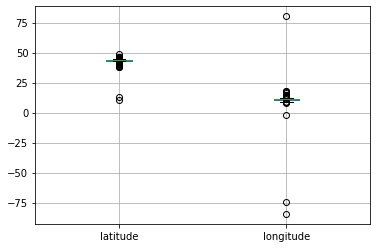

In [41]:
df.boxplot(column=['latitude','longitude'])



In [42]:
df[(df.longitude<-25) | (df.longitude>25) | (df.latitude<25)]

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK
7705,3272,Ticos Fogon,Florence,False,/Restaurant_Review-g187895-d19246858-Reviews-T...,5.0,1,2.5,Ticos Fogon,florence,...,False,10.358579,-84.491810,"South American, Costa Rican",NaN,NaN,b0A_https://maps.google.com/maps?saddr=&daddr=...,florence,/Restaurant_Review-g187895-d19246858-Reviews-T...,1
8013,1914,Il Circolino 1912,Migliarino,False,/Restaurant_Review-g1092759-d17513756-Reviews-...,4.0,32,2.5,Il Circolino 1912,pisa,...,False,13.081000,80.274000,"Italian, Seafood, Mediterranean, Tuscan, Centr...","Lunch, Dinner, Breakfast, Drinks",NaN,jpW_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g1092759-d17513756-Reviews-...,1
11394,2153,New Paradise,Elba Island,False,/Restaurant_Review-g194861-d2345606-Reviews-Ne...,2.5,316,2.5,New Paradise,livorno,...,False,43.936913,-74.838585,"Italian, Pizza, Seafood, Mediterranean",NaN,NaN,tHn_https://maps.google.com/maps?saddr=&daddr=...,livorno,NaN,1


In [43]:
for i in  df[(df.latitude.isna()) | (df.latitude<25)].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])

In [44]:
for i in  df[(df.longitude.isna()) | (df.longitude<0) | (df.longitude>25)].index:
    prov = df.loc[i,'city']
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])

<AxesSubplot:>

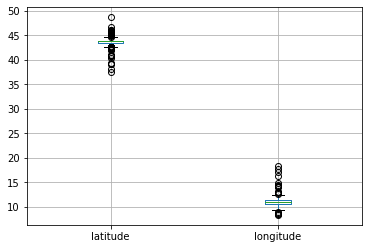

In [45]:
df.boxplot(column=['latitude','longitude'])



In [46]:
df.to_csv("../community_discovery/data/tuscany.csv")